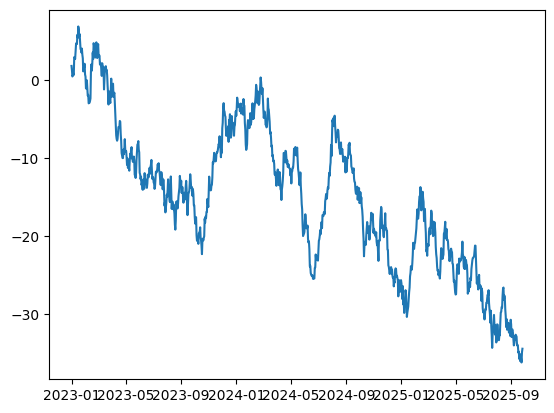

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

dates = pd.date_range('20230101', periods=1000)
values = np.random.randn(1000).cumsum()

data = pd.DataFrame({'Date': dates, 'Value': values})

plt.plot(data['Date'], data['Value'])
plt.show()

In [2]:
data.loc[100:200, 'Value'] = np.nan
print(data.loc[100:200])

          Date  Value
100 2023-04-11    NaN
101 2023-04-12    NaN
102 2023-04-13    NaN
103 2023-04-14    NaN
104 2023-04-15    NaN
..         ...    ...
196 2023-07-16    NaN
197 2023-07-17    NaN
198 2023-07-18    NaN
199 2023-07-19    NaN
200 2023-07-20    NaN

[101 rows x 2 columns]


In [3]:
# ARIMA 모델 생성
model = ARIMA(data['Value'].dropna(), order=(1,1,1))
model = model.fit()

C:\Users\김동현\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\김동현\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\김동현\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [8]:
# 모델로 결측치 예측. end=200인 경우 모델이 결측치 구간을 모르기 때문에 Nan 값만 뱉음
predicted_values = model.predict(start=100, end=2000)
# 결측치 대체
data.loc[100:200, 'Value_ARIMA'] = predicted_values
print(data.loc[100:200])

          Date  Value  Value_ARIMA
100 2023-04-11    NaN    -7.182063
101 2023-04-12    NaN   -12.834842
102 2023-04-13    NaN   -14.217386
103 2023-04-14    NaN   -12.871152
104 2023-04-15    NaN   -12.921455
..         ...    ...          ...
196 2023-07-16    NaN   -18.254648
197 2023-07-17    NaN   -17.456979
198 2023-07-18    NaN   -17.688968
199 2023-07-19    NaN   -16.876502
200 2023-07-20    NaN   -16.873070

[101 rows x 3 columns]


C:\Users\김동현\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\김동현\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


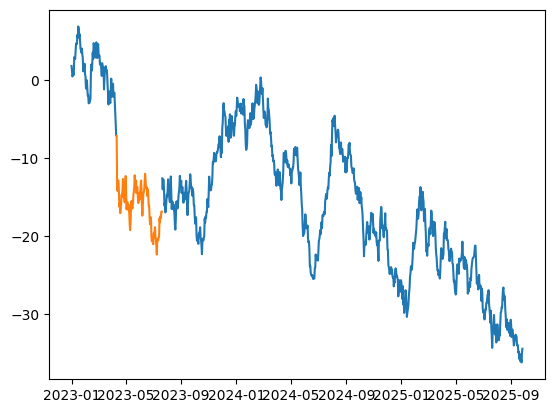

In [11]:
plt.plot(data['Date'], data['Value'])
plt.plot(data['Date'], data['Value_ARIMA'])
plt.show()